In [1]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# EDA

In [3]:
df.shape

(4177, 9)

In [4]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df = df.apply(LabelEncoder().fit_transform)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,10
4173,2,93,71,26,1411,832,426,463,9
4174,2,95,78,40,1727,994,571,550,8
4175,0,100,80,29,1610,1005,518,530,9


In [7]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [8]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,79.801053,64.576969,26.848456,1155.477137,658.703615,354.047881,413.307637,8.933445
std,0.822240,23.998661,19.841382,7.708237,660.106216,384.626787,209.390934,229.342991,3.222790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,65.000000,53.000000,22.000000,600.000000,342.000000,184.000000,224.000000,7.000000
50%,1.000000,84.000000,68.000000,27.000000,1142.000000,634.000000,339.000000,417.000000,8.000000
75%,2.000000,98.000000,79.000000,32.000000,1695.000000,949.000000,502.000000,590.000000,10.000000
max,2.000000,133.000000,110.000000,50.000000,2428.000000,1514.000000,879.000000,925.000000,27.000000


In [9]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036006,-0.038846,-0.040559,-0.026480,-0.009979,-0.035252,-0.035159,-0.034546
Length,-0.036006,1.000000,0.986815,0.898495,0.945616,0.923686,0.914853,0.925637,0.556666
Diameter,-0.038846,0.986815,1.000000,0.904767,0.946053,0.919422,0.911692,0.932714,0.574718
Height,-0.040559,0.898495,0.904767,1.000000,0.900422,0.855481,0.874504,0.906738,0.608239
Whole weight,-0.026480,0.945616,0.946053,0.900422,1.000000,0.973950,0.966996,0.966973,0.554945
Shucked weight,-0.009979,0.923686,0.919422,0.855481,0.973950,1.000000,0.940029,0.909816,0.442772
Viscera weight,-0.035252,0.914853,0.911692,0.874504,0.966996,0.940029,1.000000,0.926469,0.513213
Shell weight,-0.035159,0.925637,0.932714,0.906738,0.966973,0.909816,0.926469,1.000000,0.630742
Rings,-0.034546,0.556666,0.574718,0.608239,0.554945,0.442772,0.513213,0.630742,1.000000


In [10]:
# Viscera weight can't be zero
df[df['Viscera weight'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,1,0,0,1,0,0,0,0,0
3522,1,23,20,11,64,46,0,29,3


In [11]:
df.drop(index=[3522],inplace=True)

<AxesSubplot:>

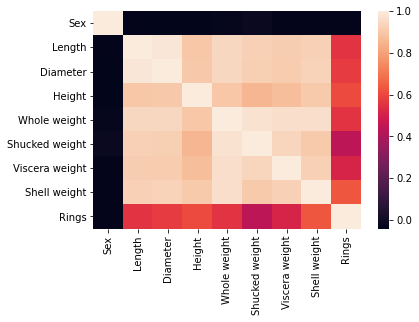

In [12]:
sns.heatmap(df.corr())

In [13]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

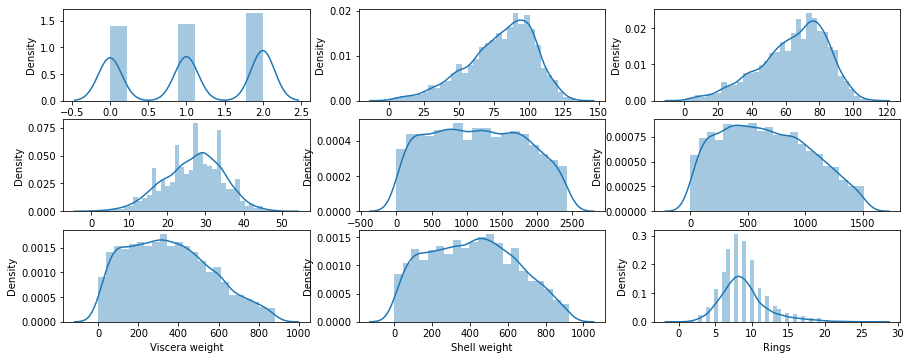

In [14]:
plt.figure(figsize=[15,20])
for i, column in enumerate(df.columns):
    plt.subplot(10,3,i+1)
    sns.distplot(df[column],kde=True)


In [15]:
# sns.pairplot(df.corr())

In [16]:
# sns.countplot(df['Rings'])

In [17]:
# plt.figure(figsize=[15,20])
# for i,column in enumerate(df.columns):
#     plt.subplot(10,3,i+1)
#     sns.violinplot(data=df,x='Rings',y=column)

In [18]:
# plt.figure(figsize=[15,20])
# for i, column in enumerate(df.columns):
#     plt.subplot(10,3,i+1)
#     sns.boxplot(df[column])

# Removing Outliers

In [19]:
X = df.iloc[:,:-1]
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,66,56,18,715,417,199,263
1,2,45,36,17,285,178,94,113
2,0,81,67,26,962,480,280,374
3,2,63,56,24,718,400,225,273
4,1,41,34,15,253,159,76,87
...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442
4173,2,93,71,26,1411,832,426,463
4174,2,95,78,40,1727,994,571,550
4175,0,100,80,29,1610,1005,518,530


In [20]:
abs_score = np.abs(stats.zscore(X))
abs_score

array([[1.15182737, 0.57602932, 0.43307667, ..., 0.62898341, 0.74112954,
        0.65600552],
       [1.15182737, 1.45166579, 1.44168085, ..., 1.25055391, 1.24275569,
        1.31026779],
       [1.28055245, 0.04942529, 0.12165563, ..., 0.46513847, 0.35416079,
        0.17185143],
       ...,
       [1.15182737, 0.63318293, 0.67638793, ..., 0.87162823, 1.03606027,
        0.59581631],
       [1.28055245, 0.84166781, 0.77724835, ..., 0.90023607, 0.7828585 ,
        0.50858134],
       [1.15182737, 1.55051637, 1.48327128, ..., 2.08616139, 1.80522038,
        1.74295617]])

In [21]:
threshold = 3
print(np.where(abs_score>3))

(array([ 236,  236,  236,  237,  237,  238,  238,  239,  526,  526,  694,
        694,  696,  696,  719,  719,  720,  720, 1174, 1257, 1429, 1429,
       1986, 1987, 1987, 2051, 2114, 2114, 2169, 2381, 3836, 3898, 3898,
       3901, 3901, 3995]), array([1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 2, 3, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2,
       1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 1, 3, 3]))


In [22]:
df.shape

(4176, 9)

In [23]:
# Removing Outliers
df = df[(abs_score<3).all(axis=1)]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,10
4173,2,93,71,26,1411,832,426,463,9
4174,2,95,78,40,1727,994,571,550,8
4175,0,100,80,29,1610,1005,518,530,9


In [24]:
df.iloc[:,-1].value_counts()

8     688
9     634
7     566
10    487
6     391
11    267
5     258
12    203
13    126
4     113
14    103
15     67
16     58
3      47
17     42
18     32
19     26
20     14
2      10
22      9
21      6
26      2
23      2
25      1
24      1
27      1
Name: Rings, dtype: int64

# Spliting Features and Target column

In [25]:
X = df.iloc[:,:-1]
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,66,56,18,715,417,199,263
1,2,45,36,17,285,178,94,113
2,0,81,67,26,962,480,280,374
3,2,63,56,24,718,400,225,273
4,1,41,34,15,253,159,76,87
...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442
4173,2,93,71,26,1411,832,426,463
4174,2,95,78,40,1727,994,571,550
4175,0,100,80,29,1610,1005,518,530


In [26]:
y = df.iloc[:,-1]
y

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Rings, Length: 4154, dtype: int64

In [27]:
y.value_counts()

8     688
9     634
7     566
10    487
6     391
11    267
5     258
12    203
13    126
4     113
14    103
15     67
16     58
3      47
17     42
18     32
19     26
20     14
2      10
22      9
21      6
26      2
23      2
25      1
24      1
27      1
Name: Rings, dtype: int64

# Checking for VIF

In [28]:
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['columns'] = X.columns
df_info.sort_values('VIF',ascending=False)

,VIF,columns
2,500.725914,Diameter
1,474.204202,Length
4,424.622479,Whole weight
5,116.533955,Shucked weight
7,108.154466,Shell weight
3,74.858563,Height
6,62.365950,Viscera weight
0,2.520189,Sex


In [29]:
X.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
dtype: int64

In [30]:
# Removing Multi-colinerity 
X = df.iloc[:,:-1]
X = X.drop(['Diameter','Whole weight'],axis=1)
df_info = pd.DataFrame()
df_info['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
df_info['column'] = X.columns
df_info.sort_values('VIF',ascending=False)

,VIF,column
1,87.056743,Length
2,71.624844,Height
4,44.895382,Viscera weight
3,41.385576,Shucked weight
5,39.627668,Shell weight
0,2.515163,Sex


# Checking for skewness

In [31]:
df.skew().sort_values()

Length           -0.580141
Diameter         -0.557709
Height           -0.183259
Sex              -0.098889
Whole weight      0.078496
Shell weight      0.139860
Shucked weight    0.239388
Viscera weight    0.368858
Rings             1.146645
dtype: float64

In [32]:
X_transform = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transform,columns=X.columns)
X

,Sex,Length,Height,Shucked weight,Viscera weight,Shell weight
0,1.124433,-0.693663,-1.186386,-0.534342,-0.661271,-0.584193
1,1.124433,-1.461380,-1.310756,-1.335135,-1.355606,-1.387817
2,-1.305600,-0.051901,-0.153200,-0.355082,-0.227452,-0.080924
3,1.124433,-0.813057,-0.417331,-0.584372,-0.515253,-0.536537
4,-0.009128,-1.588515,-1.555797,-1.412349,-1.502412,-1.554380
...,...,...,...,...,...,...
4149,-1.305600,0.271935,0.659287,0.207882,0.642784,0.204861
4150,1.124433,0.512292,-0.153200,0.521719,0.440659,0.290382
4151,1.124433,0.610498,1.783398,0.877410,1.015492,0.633038
4152,-1.305600,0.861079,0.249454,0.900761,0.813214,0.555803


In [33]:
X.skew().sort_values()

Shell weight     -0.190112
Sex              -0.176958
Shucked weight   -0.175338
Length           -0.164688
Viscera weight   -0.138374
Height           -0.056371
dtype: float64

# Train Test Split

In [34]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=41)

In [35]:
print(X_train.shape,y_train.shape)

(2783, 6) (2783,)


In [36]:
print(X_test.shape,y_test.shape)

(1371, 6) (1371,)


# Logistic Regresison

In [37]:
logisticRegression = LogisticRegression()

In [38]:
logisticRegression.fit(X_train,y_train)

/home/aarav/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_predict = logisticRegression.predict(X_test)
y_predict

array([6, 8, 8, ..., 7, 8, 9])

In [40]:
logisticRegression.score(X_test,y_test)

0.26914660831509846

In [41]:
confusion_matrix(y_test,y_predict)

array([[ 0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 18,  4, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  7, 17, 64, 16,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  8, 61, 38,  6,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  4, 35, 71, 55, 11,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3, 22, 56, 92, 40,  9,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 18, 23, 81, 60, 30,  1,  3,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  3, 11, 45, 51, 45,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,

### Grid Search CV

In [42]:
param_grid = {
    'penalty' : ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver' : ['liblinear']
}
cv = GridSearchCV(LogisticRegression(),param_grid=param_grid,n_jobs=10)

In [43]:
cv.fit(X_train,y_train)

/home/aarav/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=LogisticRegression(), n_jobs=10,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [44]:
cv.best_score_

0.25117471552381077

In [45]:
cv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

### Cross Validation

In [46]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    LogisticRegression(C=1,penalty='l1',solver='liblinear'),
    X,
    y,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
)

In [47]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.24337233549582943
std: 0.01432366679426808


In [48]:
pickle.dump(logisticRegression,open('logistic_regression.pkl','wb'))

# Decision Tree Classifier

In [49]:
decisionTreeClassifier = DecisionTreeClassifier(max_depth=10)

In [50]:
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [51]:
y_pred = decisionTreeClassifier.predict(X_test)

In [52]:
metrics.accuracy_score(y_test,y_pred)

0.22975929978118162

### Grid Search CV

In [53]:
param_grid = {
    'criterion': ['entropy','gini'],
    'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
    'min_samples_leaf': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
}
cv = GridSearchCV(DecisionTreeClassifier(max_depth=10),param_grid=param_grid,n_jobs=10)

In [54]:
cv.fit(X_train,y_train)

/home/aarav/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=10), n_jobs=10,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                              20, 30, 40, 50, 70, 90, 120,
                                              150]})

In [55]:
cv.best_score_

0.26591193831290444

In [56]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30}

### Cross Validation 

In [57]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf=  30),
    X,
    y,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1
    
)

In [58]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.26335437905468023
std: 0.012839543226307416


In [59]:
pickle.dump(KFold,open('kfold.pkl','wb'))

# SVM 

In [60]:
svc = SVC(kernel='linear')

In [61]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [62]:
y_pred = svc.predict(X_test)
y_pred

array([6, 8, 8, ..., 7, 8, 9])

In [63]:
metrics.accuracy_score(y_test,y_pred)

0.2567469000729395

### Grid Search CV

In [64]:
param_grid = {
    'C': [1,10,100],
    'kernel': ('linear','rbf'),
    'gamma' : [1e-3, 1e-4]
}
cv = GridSearchCV(SVC(kernel='linear'),param_grid=param_grid,n_jobs=10)

In [65]:
cv.fit(X_train,y_train)

/home/aarav/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=10,
             param_grid={'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                         'kernel': ('linear', 'rbf')})

In [66]:
cv.best_score_

0.26410175270914327

In [67]:
cv.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}

### Cross Validation 

In [68]:
cv = KFold(
    n_splits=10,random_state=42,shuffle=True
)
scores = cross_val_score(
    SVC(C =  10, gamma = 0.001, kernel = 'linear'),
    X,
    y,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

In [69]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.2633433734939759
std: 0.02555221268410239


In [70]:
pickle.dump(svc,open('svc.pkl','wb'))

# KNN

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred = knn.predict(X_test)

In [74]:
metrics.accuracy_score(y_test,y_pred)

0.2049598832968636

### Grid Search CV

In [75]:
param_grid = {
    'n_neighbors': [2,3,5,11,19],
    'weights':['uniform','distance'],
    'metric' : ['euclidean','manhattan']
}
cv = GridSearchCV(KNeighborsClassifier(n_neighbors=5),param_grid=param_grid,n_jobs=10)

In [76]:
cv.fit(X_train,y_train)

/home/aarav/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=10,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 11, 19],
                         'weights': ['uniform', 'distance']})

In [77]:
cv.best_score_

0.25800537308035076

In [78]:
cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}

### Cross Validation 

In [79]:
cv = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(
    KNeighborsClassifier(metric= 'euclidean', n_neighbors = 19, weights = 'uniform'),
    X,
    y,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

In [80]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.24121408711770162
std: 0.013667352928006417


In [81]:
pickle.dump(knn,open('knn.pkl','wb'))

# Conclusion

Best Model is SVM with 25%

### If we put the binning in rings
* 1  [0,4] Less rings
* 2  [5,15] Middum Rings
* 3  [16-29] Many Rtings

In [82]:
df['Rings']

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: Rings, Length: 4154, dtype: int64

In [83]:
def apply_binning(rings):
    if rings > 15:
        return 3
    elif rings > 4 and rings <= 15:
        return 2
    else:
        return 1

In [84]:
df['Rings'] = df['Rings'].apply(apply_binning)
df

<ipython-input-84-24ef883f2c9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rings'] = df['Rings'].apply(apply_binning)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,2
1,2,45,36,17,285,178,94,113,2
2,0,81,67,26,962,480,280,374,2
3,2,63,56,24,718,400,225,273,2
4,1,41,34,15,253,159,76,87,2
...,...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442,2
4173,2,93,71,26,1411,832,426,463,2
4174,2,95,78,40,1727,994,571,550,2
4175,0,100,80,29,1610,1005,518,530,2


In [85]:
df['Rings'].value_counts()

2    3790
3     194
1     170
Name: Rings, dtype: int64

In [86]:
X = df.iloc[:,:-1]
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,66,56,18,715,417,199,263
1,2,45,36,17,285,178,94,113
2,0,81,67,26,962,480,280,374
3,2,63,56,24,718,400,225,273
4,1,41,34,15,253,159,76,87
...,...,...,...,...,...,...,...,...
4172,0,88,73,32,1289,698,475,442
4173,2,93,71,26,1411,832,426,463
4174,2,95,78,40,1727,994,571,550
4175,0,100,80,29,1610,1005,518,530


In [87]:
y = df.iloc[:,-1]
y

0       2
1       2
2       2
3       2
4       2
       ..
4172    2
4173    2
4174    2
4175    2
4176    2
Name: Rings, Length: 4154, dtype: int64

## appling SMOTE

In [88]:
smote = SMOTE()

In [89]:
X, y = smote.fit_resample(X,y)

In [90]:
y.value_counts()

1    3790
2    3790
3    3790
Name: Rings, dtype: int64

## appling SVM

In [91]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=41)

In [92]:
svc = SVC()

In [93]:
svc.fit(X_train,y_train)

SVC()

In [94]:
y_pred = svc.predict(X_test)

In [95]:
metrics.accuracy_score(y_test,y_pred)

0.8499866773248068

## Grid Search CV

In [96]:
param_grid = {
    'C': [1,10,100],
    'kernel': ('linear','rbf'),
    'gamma' : [1e-3, 1e-4]
}
cv = GridSearchCV(SVC(kernel='linear'),param_grid=param_grid,n_jobs=20)

In [ ]:
cv.fit(X_train,y_train)

In [ ]:
cv.best_score_

In [ ]:
cv.best_params_

### Cross Validation 

In [ ]:
cv = KFold(
    n_splits=10,random_state=42,shuffle=True
)
scores = cross_val_score(
    SVC(C =  10, gamma = 0.001, kernel = 'linear'),
    X,
    y,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

In [ ]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

In [ ]:
pickle.dump(svc,open('svc.pkl','wb'))